In [2]:
import pandas as pd
import numpy as np
from pandas import crosstab
import matplotlib.pyplot as plt

import seaborn as sns

%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [3]:
import pandas as pd

# Load the dataset
data = pd.read_csv('dataset.csv')

# Display the first few rows
print(data.head())


   Marital status  Application mode  Application order  Course  \
0               1                 8                  5       2   
1               1                 6                  1      11   
2               1                 1                  5       5   
3               1                 8                  2      15   
4               2                12                  1       3   

   Daytime/evening attendance  Previous qualification  Nacionality  \
0                           1                       1            1   
1                           1                       1            1   
2                           1                       1            1   
3                           1                       1            1   
4                           0                       1            1   

   Mother's qualification  Father's qualification  Mother's occupation  ...  \
0                      13                      10                    6  ...   
1                       

In [4]:
data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [5]:
data.shape

(4424, 35)

In [6]:
# Get a summary of the dataset
print(data.info())

# Get basic statistics of numerical features
print(data.describe())

# Check for missing values
print(data.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

       Marital status  Application mode  Application order       Course  \
count     4424.000000       4424.000000        4424.000000  4424.000000   
mean         1.178571          6.886980           1.727848     9.899186   
std          0.605747          5.298964           1.313793     4.331792   
min          1.000000          1.000000           0.000000     1.000000   
25%          1.000000          1.000000           1.000000     6.000000   
50%          1.000000          8.000000           1.000000    10.000000   
75%          1.000000         12.000000           2.000000    13.000000   
max          6.000000         18.000000           9.000000    17.000000   

       Daytime/evening attendance  Previous qualification  Nacionality  \
count                 4424.000000             4424.000000  4424.000000   
mean                     0.890823                2.531420     1.254521   
std                      0.311897                3.963707     1.748447   
min                      0.0

In [7]:
print(data.columns)

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Displaced',
       'Educational special needs', 'Debtor', 'Tuition fees up to date',
       'Gender', 'Scholarship holder', 'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)

In [8]:
# Drop rows with missing target values
data.dropna(subset=['Target'], inplace=True)

# Impute missing values in features (adjust column names as needed)
from sklearn.impute import SimpleImputer

# Define numerical and categorical features based on the dataset
numeric_features = ['Age at enrollment', 'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)', 'Unemployment rate', 'Inflation rate', 'GDP']
categorical_features = ['Marital status', 'Application mode', 'Application order', 'Course', 'Daytime/evening attendance', 'Previous qualification', 'Nacionality', "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", 'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'International']

# Impute numerical features with mean
numeric_imputer = SimpleImputer(strategy='mean')
data[numeric_features] = numeric_imputer.fit_transform(data[numeric_features])

# Impute categorical features with most frequent value
categorical_imputer = SimpleImputer(strategy='most_frequent')
data[categorical_features] = categorical_imputer.fit_transform(data[categorical_features])


In [9]:
from sklearn.preprocessing import OneHotEncoder

# OneHotEncode categorical variables
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
encoded_categorical = encoder.fit_transform(data[categorical_features])

# Create a DataFrame with the encoded categorical variables
encoded_categorical_df = pd.DataFrame(encoded_categorical, columns=encoder.get_feature_names_out(categorical_features))

# Concatenate encoded features with the original dataset
data = pd.concat([data.drop(columns=categorical_features), encoded_categorical_df], axis=1)


In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data[numeric_features] = scaler.fit_transform(data[numeric_features])


In [11]:
# Example: Create an interaction feature between grades in 1st and 2nd semesters
data['grades_interaction'] = data['Curricular units 1st sem (grade)'] * data['Curricular units 2nd sem (grade)']


In [12]:
from sklearn.model_selection import train_test_split

# Replace 'Target' with the correct column name
X = data.drop(columns=['Target'])
y = data['Target'].apply(lambda x: 1 if x == 'Dropout' else 0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [14]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

y_pred = model.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))

# Print confusion matrix
print(confusion_matrix(y_test, y_pred))

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred)
print(f"ROC-AUC Score: {roc_auc}")


              precision    recall  f1-score   support

           0       0.84      0.95      0.89       569
           1       0.89      0.68      0.77       316

    accuracy                           0.86       885
   macro avg       0.86      0.82      0.83       885
weighted avg       0.86      0.86      0.85       885

[[541  28]
 [100 216]]
ROC-AUC Score: 0.817167582478699


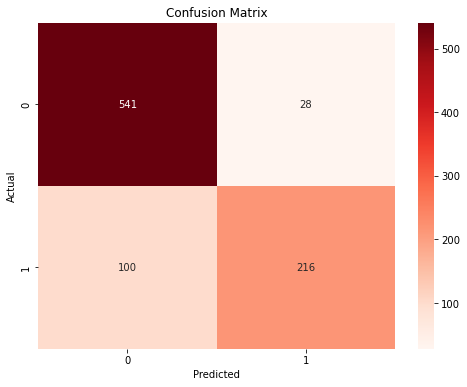

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [21]:
# Plot confusion matrix

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['Dropout', 'Enrolled', 'Graduate'], yticklabels=['Dropout', 'Enrolled', 'Graduate'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

ValueError: Must pass 2-d input. shape=()

<Figure size 576x432 with 0 Axes>

The top-left cell (541) represents students who did not drop out and were correctly predicted as non-dropouts.
The top-right cell (28) represents students who did not drop out but were incorrectly predicted as dropouts.
The bottom-left cell (100) represents students who dropped out but were incorrectly predicted as non-dropouts.
The bottom-right cell (216) represents students who dropped out and were correctly predicted as dropouts.”

In [17]:
##histogram - visual representation
#sns.set_theme(style = 'darkgrid')
#data.hist(bins=10, figsize=(40, 35), grid=True, legend=None);


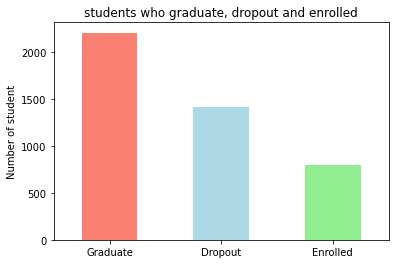

In [18]:
# how many of each class there in Target column
data.Target.value_counts().plot(kind='bar', color=['salmon', 'lightblue', 'lightgreen'])
plt.title("students who graduate, dropout and enrolled")
plt.ylabel("Number of student")
plt.xticks(rotation=0);

In [19]:
sns.countplot(data=data, x='Gender', hue='Target', hue_order=['Dropout', 'Enrolled', 'Graduate'])
plt.xticks(ticks=[0,1], labels=['Female','Male'])
plt.ylabel('Number of Students')
plt.show()

ValueError: Could not interpret input 'Gender'

In [ ]:
data['Target'].value_counts()

Graduate    2209
Dropout     1421
Enrolled     794
Name: Target, dtype: int64

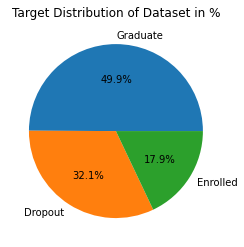

In [ ]:
#store the value counts in a variable
students_target = data['Target'].value_counts()

#visualize the target variable
plt.pie(students_target, labels=students_target.index, autopct='%2.1f%%')
plt.title('Target Distribution of Dataset in %')
plt.show()

In [ ]:
#gender affecting academic status of students
sns.countplot(data=data, x='Gender', hue='Target', hue_order=['Dropout', 'Enrolled', 'Graduate'])

plt.xticks(ticks=[0,1], labels=['Female', 'Male'])
plt.ylabel('Number of Students')
plt.show()

ValueError: Could not interpret input 'Gender'